In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

from canguro_processing_tools.trajectories.trajectory_2d import Trajectory2D

In [3]:
def read_odometry(data: pd.DataFrame) -> np.ndarray:
    x = data["cart_x"].to_numpy()
    y = data["cart_y"].to_numpy()
    yaw = np.array([quaternion_to_yaw(data["quat_x"][i],
                                            data["quat_y"][i],
                                            data["quat_z"][i],
                                            data["quat_w"][i]) for i in range(x.shape[0])])
    result = np.column_stack((x, y, yaw))
    return result

def quaternion_to_yaw(x: float, y: float, z: float, w: float) -> float:
    t2 = +2.0 * (w * y - z * x)
    t2 = +1.0 if t2 > +1.0 else t2
    t2 = -1.0 if t2 < -1.0 else t2
    t3 = +2.0 * (w * z + x * y)
    t4 = +1.0 - 2.0 * (y * y + z * z)
    yaw = np.arctan2(t3, t4)
    return yaw

In [4]:
TRAJECTORY_PATH = Path("/mnt/vol0/datasets/egowalk/extracted/2024_08_31/2024_08_31__16_27_43")

In [5]:
odom_df = pd.read_csv(str(TRAJECTORY_PATH / "odometry.csv"))
trajectory = read_odometry(odom_df)

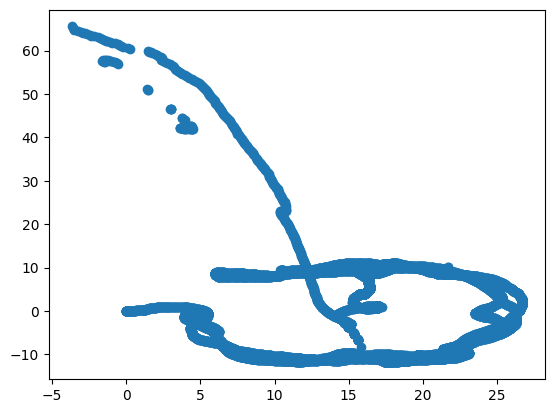

In [6]:
plt.scatter(trajectory[:, 0], trajectory[:, 1])

In [7]:
odom_df

,timestamp,quat_x,quat_y,quat_z,quat_w,cart_x,cart_y,cart_z
0,1725110865456,-0.050518,0.044365,-0.002248,0.997735,0.000000,0.000000,0.000000
1,1725110865489,-0.050518,0.044365,-0.002248,0.997735,0.000000,0.000000,0.000000
2,1725110865522,-0.048640,0.043827,-0.001907,0.997853,-0.000280,-0.001620,-0.001476
3,1725110865555,-0.046328,0.043539,-0.002121,0.997975,0.000504,-0.003373,-0.002266
4,1725110865588,-0.043836,0.043825,-0.002251,0.998074,0.000663,-0.004720,-0.001402
...,...,...,...,...,...,...,...,...
8318,1725111143636,-0.077593,-0.019860,0.917803,0.388875,10.464559,9.399096,0.051102
8319,1725111143669,-0.080563,-0.018666,0.916796,0.390700,10.446529,9.411627,0.052063
8320,1725111143703,-0.082524,-0.017966,0.916103,0.391948,10.428415,9.423837,0.051659
8321,1725111143736,-0.084783,-0.017252,0.915748,0.392326,10.418063,9.436438,0.053469


In [8]:
timestamps = odom_df["timestamp"].to_numpy() / 1000.
fpss = 1. / np.diff(timestamps)

In [9]:
traj_2d = Trajectory2D.read(TRAJECTORY_PATH)

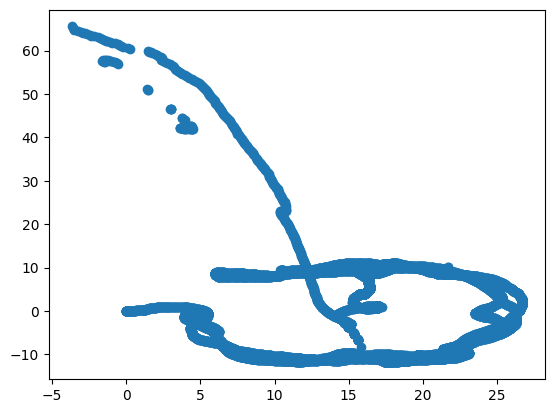

In [10]:
plt.scatter(traj_2d.poses[:, 0], traj_2d.poses[:, 1])

In [11]:
traj_2d_completes = traj_2d.split_on_completes()
ref_ts = traj_2d.poses_timestamps
target_ts = []
for e in traj_2d_completes:
    target_ts = target_ts + e.frames_timestamps
np.allclose(np.array(ref_ts), np.array(target_ts))

True

In [12]:
len(traj_2d_completes)

3

In [16]:
len(traj_2d_completes[0].frames)

5411

In [14]:
len(traj_2d.frames) - sum([len(e.frames) for e in traj_2d_completes])

7

In [15]:
for e in traj_2d_completes:
    print(np.allclose(np.array(e.frames_timestamps),
                      np.array(e.poses_timestamps)))

True
True
True


In [21]:
sample_traj = traj_2d_completes[0]
print((sample_traj.poses_timestamps[-1] - sample_traj.poses_timestamps[0]) / 1000.)
print(len(sample_traj.frames) / 30)

180.718
180.36666666666667


In [23]:
print(sample_traj.camera_height)

None
